In [39]:
library(dplyr)
library(Hmisc)
library(MESS)

## change the size of the graphs
options(repr.plot.width = 3, repr.plot.height = 3)

In [2]:
library(ggplot2)

In [3]:
require(ggplot2)
require(reshape2)

Loading required package: reshape2


In [64]:
weather <- read.csv(file="C:/Users/Chen/Project/data/weather.csv")
head(weather)  

Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2


In [65]:
describe(weather)

weather 

 22  Variables      2944  Observations
--------------------------------------------------------------------------------
Station 
       n  missing distinct     Info     Mean      Gmd 
    2944        0        2     0.75      1.5   0.5002 
                    
Value         1    2
Frequency  1472 1472
Proportion  0.5  0.5
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
    2944        0     1472 

lowest : 2007-05-01 2007-05-02 2007-05-03 2007-05-04 2007-05-05
highest: 2014-10-27 2014-10-28 2014-10-29 2014-10-30 2014-10-31
--------------------------------------------------------------------------------
Tmax 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    2944        0       63    0.999    76.17    12.89       54       60 
     .25      .50      .75      .90      .95 
      69       78       85       89       92 

lowest :  41  42  44  45  46, highest: 100 101 102 103 104
----------

In [66]:
str(weather)

'data.frame':	2944 obs. of  22 variables:
 $ Station    : int  1 2 1 2 1 2 1 2 1 2 ...
 $ Date       : Factor w/ 1472 levels "2007-05-01","2007-05-02",..: 1 1 2 2 3 3 4 4 5 5 ...
 $ Tmax       : int  83 84 59 60 66 67 66 78 66 66 ...
 $ Tmin       : int  50 52 42 43 46 48 49 51 53 54 ...
 $ Tavg       : Factor w/ 60 levels "36","37","38",..: 32 33 16 17 21 23 23 60 25 25 ...
 $ Depart     : Factor w/ 42 levels "-1","-10","-11",..: 32 42 11 42 20 42 22 42 23 42 ...
 $ DewPoint   : int  51 51 42 42 40 40 41 42 38 39 ...
 $ WetBulb    : Factor w/ 48 levels "32","33","34",..: 25 26 16 16 17 19 19 19 18 19 ...
 $ Heat       : Factor w/ 31 levels "0","1","10","11",..: 1 1 7 6 30 28 28 31 26 26 ...
 $ Cool       : Factor w/ 31 levels " 0"," 1"," 2",..: 3 4 1 1 1 1 1 31 1 1 ...
 $ Sunrise    : Factor w/ 122 levels "-","0416","0417",..: 34 1 33 1 32 1 30 1 29 1 ...
 $ Sunset     : Factor w/ 119 levels "-","1647","1649",..: 76 1 77 1 78 1 79 1 80 1 ...
 $ CodeSum    : Factor w/ 98 levels " ","BC

In [11]:
sum(weather$Tavg == 'T')
sum(weather$Tavg == 'M')

[1] 0

[1] 11

In [17]:
sum(weather$Depart == 'T')
sum(weather$Depart == 'M')

[1] 0

[1] 1472

In [18]:
sum(weather$WetBulb == 'T')
sum(weather$WetBulb == 'M')

[1] 0

[1] 4

In [19]:
sum(weather$Heat == 'T')
sum(weather$Heat== 'M')

[1] 0

[1] 11

In [67]:
weaWNV<-weather

In [68]:
head(weaWNV)

Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2


In [69]:
weaWNV[weather=="M"]<-NA

In [78]:
describe(weaWNV)

weaWNV 

 22  Variables      2944  Observations
--------------------------------------------------------------------------------
Station 
       n  missing distinct     Info     Mean      Gmd 
    2944        0        2     0.75      1.5   0.5002 
                    
Value         1    2
Frequency  1472 1472
Proportion  0.5  0.5
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
    2944        0     1472 

lowest : 2007-05-01 2007-05-02 2007-05-03 2007-05-04 2007-05-05
highest: 2014-10-27 2014-10-28 2014-10-29 2014-10-30 2014-10-31
--------------------------------------------------------------------------------
Tmax 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    2944        0       63    0.999    76.17    12.89       54       60 
     .25      .50      .75      .90      .95 
      69       78       85       89       92 

lowest :  41  42  44  45  46, highest: 100 101 102 103 104
-----------

In [80]:
weaWNV[17] <- lapply(weaWNV[17], chartr, old = "T", new = "0.001") # PrecipTotal
weaWNV$SnowFall
head(weaWNV, 10)

Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,NA,0.0,0.00,29.10,29.82,1.7,27,9.2
2,2007-05-01,84,52,68,NA,51,57,0,3,...,,NA,NA,NA,0.00,29.18,29.82,2.7,25,9.6
1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,NA,0.0,0.00,29.38,30.09,13.0,4,13.4
2,2007-05-02,60,43,52,NA,42,47,13,0,...,BR HZ,NA,NA,NA,0.00,29.44,30.08,13.3,2,13.4
1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,NA,0.0,0.00,29.39,30.12,11.7,7,11.9
2,2007-05-03,67,48,58,NA,40,50,7,0,...,HZ,NA,NA,NA,0.00,29.46,30.12,12.9,6,13.2
1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,NA,0.0,0,29.31,30.05,10.4,8,10.8
2,2007-05-04,78,51,NA,NA,42,50,NA,NA,...,,NA,NA,NA,0.00,29.36,30.04,10.1,7,10.4
1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,NA,0.0,0,29.40,30.10,11.7,7,12.0
2,2007-05-05,66,54,60,NA,39,50,5,0,...,,NA,NA,NA,0,29.46,30.09,11.2,7,11.5


In [82]:
weaWNV[16] <- lapply(weaWNV[16], chartr, old = "T", new = "0.001") # SnowFall

head(weaWNV, 10)

Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,NA,0.0,0.00,29.10,29.82,1.7,27,9.2
2,2007-05-01,84,52,68,NA,51,57,0,3,...,,NA,NA,NA,0.00,29.18,29.82,2.7,25,9.6
1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,NA,0.0,0.00,29.38,30.09,13.0,4,13.4
2,2007-05-02,60,43,52,NA,42,47,13,0,...,BR HZ,NA,NA,NA,0.00,29.44,30.08,13.3,2,13.4
1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,NA,0.0,0.00,29.39,30.12,11.7,7,11.9
2,2007-05-03,67,48,58,NA,40,50,7,0,...,HZ,NA,NA,NA,0.00,29.46,30.12,12.9,6,13.2
1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,NA,0.0,0,29.31,30.05,10.4,8,10.8
2,2007-05-04,78,51,NA,NA,42,50,NA,NA,...,,NA,NA,NA,0.00,29.36,30.04,10.1,7,10.4
1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,NA,0.0,0,29.40,30.10,11.7,7,12.0
2,2007-05-05,66,54,60,NA,39,50,5,0,...,,NA,NA,NA,0,29.46,30.09,11.2,7,11.5


In [93]:
describe(weaWNV)

weaWNV 

 20  Variables      2944  Observations
--------------------------------------------------------------------------------
Station 
       n  missing distinct 
    2944        0        2 
                    
Value         1    2
Frequency  1472 1472
Proportion  0.5  0.5
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
    2944        0     1472 

lowest : 2007-05-01 2007-05-02 2007-05-03 2007-05-04 2007-05-05
highest: 2014-10-27 2014-10-28 2014-10-29 2014-10-30 2014-10-31
--------------------------------------------------------------------------------
Tmax 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    2944        0       63    0.999    76.17    12.89       54       60 
     .25      .50      .75      .90      .95 
      69       78       85       89       92 

lowest :  41  42  44  45  46, highest: 100 101 102 103 104
-----------------------------------------------------------------

In [20]:

#weather$Tavg <- as.numeric(weather$Tavg)

#weather$Depart <- as.numeric(weather$Depart)
#weather$WetBulb <- as.numeric(weather$WetBulb)
#weather$Heat<- as.numeric(weather$Heat)
#weather$Cool <- as.numeric(weather$Cool)
#weather$Sunrise <- as.character(format="%H:%M")




In [84]:
weaWNV["Water1"] <- NULL
weaWNV["Depth"] <- NULL

In [85]:
weaWNV$Date <- as.Date(weaWNV$Date, format = "%Y-%m-%d")

In [86]:
weaWNV$Tavg <- as.numeric(weaWNV$Tavg)

In [87]:
weaWNV$Station <- as.factor(weaWNV$Station)

In [88]:
weaWNV$Depart <- as.numeric(weaWNV$Depart)
weaWNV$WetBulb <- as.numeric(weaWNV$WetBulb)
weaWNV$Heat<- as.numeric(weaWNV$Heat)
weaWNV$Cool <- as.numeric(weaWNV$Cool)
weaWNV$PrecipTotal<- as.numeric(weaWNV$PrecipTotal)
weaWNV$SnowFall<- as.numeric(weaWNV$SnowFall)

In [89]:
weaWNV$Sunrise <- as.character(weaWNV$Sunrise, format="%H:%M")
weaWNV$Sunset <- as.character(weaWNV$Sunset, format="%H:%M")

In [92]:
head(weaWNV, 10)

Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1,2007-05-01,83,50,32,32,51,25,1,3,0448,1849,,0,0,29.10,29.82,1.7,27,9.2
2,2007-05-01,84,52,33,NA,51,26,1,4,-,-,,NA,0,29.18,29.82,2.7,25,9.6
1,2007-05-02,59,42,16,11,42,16,7,1,0447,1850,BR,0,0,29.38,30.09,13.0,4,13.4
2,2007-05-02,60,43,17,NA,42,16,6,1,-,-,BR HZ,NA,0,29.44,30.08,13.3,2,13.4
1,2007-05-03,66,46,21,20,40,17,30,1,0446,1851,,0,0,29.39,30.12,11.7,7,11.9
2,2007-05-03,67,48,23,NA,40,19,28,1,-,-,HZ,NA,0,29.46,30.12,12.9,6,13.2
1,2007-05-04,66,49,23,22,41,19,28,1,0444,1852,RA,0,0,29.31,30.05,10.4,8,10.8
2,2007-05-04,78,51,NA,NA,42,19,NA,NA,-,-,,NA,0,29.36,30.04,10.1,7,10.4
1,2007-05-05,66,53,25,23,38,18,26,1,0443,1853,,0,0,29.40,30.10,11.7,7,12.0
2,2007-05-05,66,54,25,NA,39,19,26,1,-,-,,NA,0,29.46,30.09,11.2,7,11.5


In [94]:
describe(weaWNV)

weaWNV 

 20  Variables      2944  Observations
--------------------------------------------------------------------------------
Station 
       n  missing distinct 
    2944        0        2 
                    
Value         1    2
Frequency  1472 1472
Proportion  0.5  0.5
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
    2944        0     1472 

lowest : 2007-05-01 2007-05-02 2007-05-03 2007-05-04 2007-05-05
highest: 2014-10-27 2014-10-28 2014-10-29 2014-10-30 2014-10-31
--------------------------------------------------------------------------------
Tmax 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    2944        0       63    0.999    76.17    12.89       54       60 
     .25      .50      .75      .90      .95 
      69       78       85       89       92 

lowest :  41  42  44  45  46, highest: 100 101 102 103 104
-----------------------------------------------------------------

In [95]:
summary(weaWNV)

 Station       Date                 Tmax             Tmin            Tavg      
 1:1472   Min.   :2007-05-01   Min.   : 41.00   Min.   :29.00   Min.   : 1.00  
 2:1472   1st Qu.:2009-03-16   1st Qu.: 69.00   1st Qu.:50.00   1st Qu.:25.00  
          Median :2011-01-30   Median : 78.00   Median :59.00   Median :34.00  
          Mean   :2011-01-30   Mean   : 76.17   Mean   :57.81   Mean   :32.24  
          3rd Qu.:2012-12-15   3rd Qu.: 85.00   3rd Qu.:66.00   3rd Qu.:40.00  
          Max.   :2014-10-31   Max.   :104.00   Max.   :83.00   Max.   :59.00  
                                                                NA's   :11     
     Depart         DewPoint        WetBulb           Heat       
 Min.   : 1.00   Min.   :22.00   Min.   : 1.00   Min.   : 1.000  
 1st Qu.:13.00   1st Qu.:46.00   1st Qu.:22.00   1st Qu.: 1.000  
 Median :20.00   Median :54.00   Median :30.00   Median : 1.000  
 Mean   :18.82   Mean   :53.46   Mean   :28.31   Mean   : 6.301  
 3rd Qu.:25.00   3rd Qu.:62.00

In [61]:
#weaWNV$PrecipTotal <- as.numeric(weaWNV$PrecipTotal)
#weaWNV$StnPressure <- as.numeric(weaWNV$StnPressure)
#weaWNV$SeaLevel<- as.numeric(weaWNV$SeaLevel)
#weaWNV$AvgSpeed <- as.numeric(weaWNV$AvgSpeed)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [55]:
str(weaWNV)

'data.frame':	2944 obs. of  22 variables:
 $ Station    : int  1 2 1 2 1 2 1 2 1 2 ...
 $ Date       : Factor w/ 1472 levels "2007-05-01","2007-05-02",..: 1 1 2 2 3 3 4 4 5 5 ...
 $ Tmax       : int  83 84 59 60 66 67 66 78 66 66 ...
 $ Tmin       : int  50 52 42 43 46 48 49 51 53 54 ...
 $ Tavg       : Factor w/ 60 levels "36","37","38",..: 32 33 16 17 21 23 23 NA 25 25 ...
 $ Depart     : Factor w/ 42 levels "-1","-10","-11",..: 32 NA 11 NA 20 NA 22 NA 23 NA ...
 $ DewPoint   : int  51 51 42 42 40 40 41 42 38 39 ...
 $ WetBulb    : Factor w/ 48 levels "32","33","34",..: 25 26 16 16 17 19 19 19 18 19 ...
 $ Heat       : Factor w/ 31 levels "0","1","10","11",..: 1 1 7 6 30 28 28 NA 26 26 ...
 $ Cool       : Factor w/ 31 levels " 0"," 1"," 2",..: 3 4 1 1 1 1 1 NA 1 1 ...
 $ Sunrise    : Factor w/ 122 levels "-","0416","0417",..: 34 1 33 1 32 1 30 1 29 1 ...
 $ Sunset     : Factor w/ 119 levels "-","1647","1649",..: 76 1 77 1 78 1 79 1 80 1 ...
 $ CodeSum    : Factor w/ 98 levels " ","BC

In [59]:
describe(weaWNV)

weaWNV 

 22  Variables      2944  Observations
--------------------------------------------------------------------------------
Station 
       n  missing distinct     Info     Mean      Gmd 
    2944        0        2     0.75      1.5   0.5002 
                    
Value         1    2
Frequency  1472 1472
Proportion  0.5  0.5
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
    2944        0     1472 

lowest : 2007-05-01 2007-05-02 2007-05-03 2007-05-04 2007-05-05
highest: 2014-10-27 2014-10-28 2014-10-29 2014-10-30 2014-10-31
--------------------------------------------------------------------------------
Tmax 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    2944        0       63    0.999    76.17    12.89       54       60 
     .25      .50      .75      .90      .95 
      69       78       85       89       92 

lowest :  41  42  44  45  46, highest: 100 101 102 103 104
-----------

In [57]:
summary(weaWNV)

    Station            Date           Tmax             Tmin      
 Min.   :1.0   2007-05-01:   2   Min.   : 41.00   Min.   :29.00  
 1st Qu.:1.0   2007-05-02:   2   1st Qu.: 69.00   1st Qu.:50.00  
 Median :1.5   2007-05-03:   2   Median : 78.00   Median :59.00  
 Mean   :1.5   2007-05-04:   2   Mean   : 76.17   Mean   :57.81  
 3rd Qu.:2.0   2007-05-05:   2   3rd Qu.: 85.00   3rd Qu.:66.00  
 Max.   :2.0   2007-05-06:   2   Max.   :104.00   Max.   :83.00  
               (Other)   :2932                                   
      Tavg          Depart        DewPoint        WetBulb          Heat     
 73     : 138    2     :  93   Min.   :22.00   63     : 135   0      :1870  
 70     : 117   -1     :  84   1st Qu.:46.00   65     : 131   4      :  88  
 77     : 117   -2     :  80   Median :54.00   59     : 129   1      :  86  
 75     : 110    5     :  77   Mean   :53.46   61     : 123   2      :  81  
 71     : 109    1     :  76   3rd Qu.:62.00   64     : 121   8      :  67  
 (Other):2

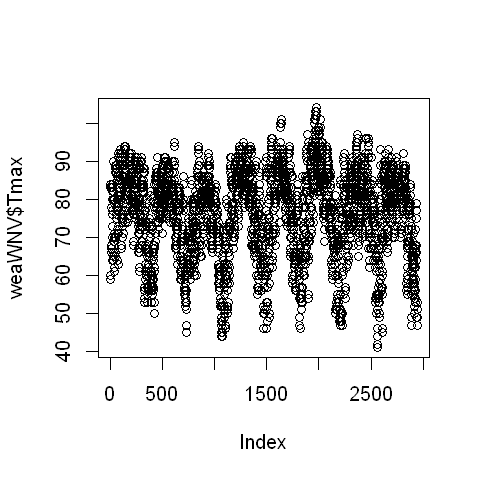

In [58]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(weaWNV$Tmax)


v <- c(7,12,28,3,41)
t <- c(14,7,6,19,3)
plot(v,type = "o",col = "red", xlab = "Month", ylab = "Rain fall", 
   main = "Rain fall chart")

lines(t, type = "o", col = "blue")

# Tmax Comparison Station 1 vs 2

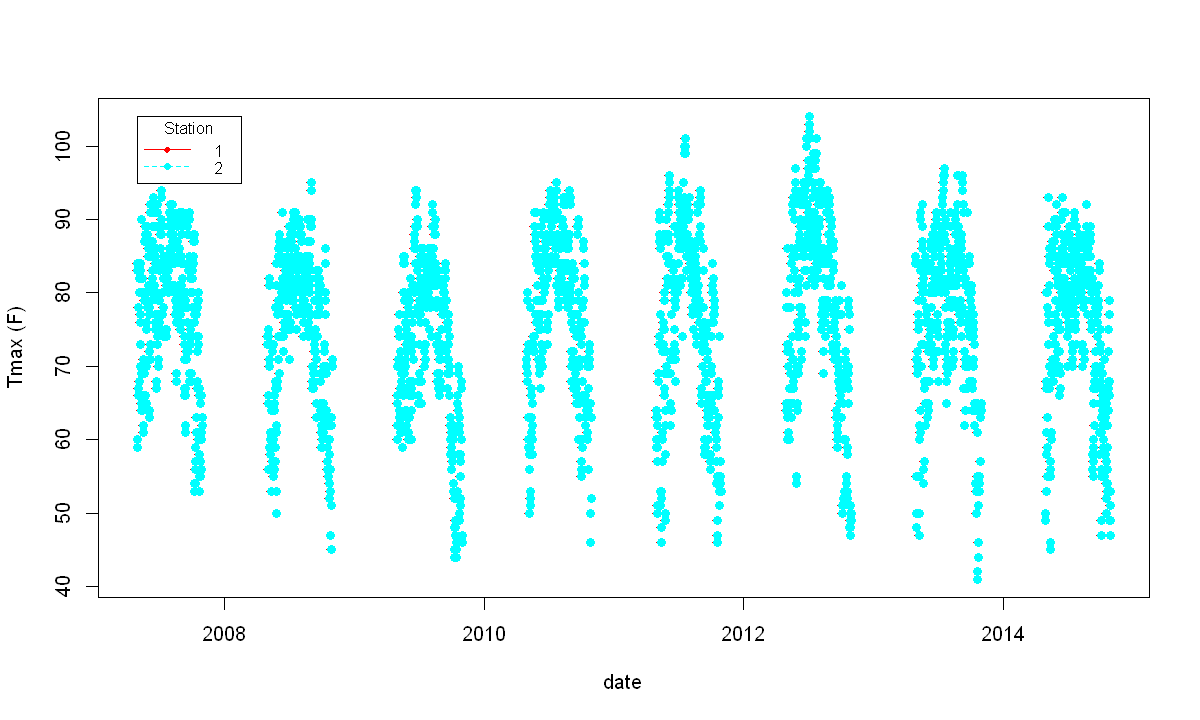

In [41]:
# options(repr.plot.width = 10, repr.plot.height = 6)
# convert factor to numeric for convenience 
weaWNV$Station <- as.numeric(weaWNV$Station) 
nst<-max(weaWNV$Station)

# get the range for the x and y axis 
xrange <- range(weaWNV$Date) 
yrange <- range(weaWNV$Tmax) 

# set up the plot 
plot(xrange, yrange, type="n", xlab="date",
   ylab="Tmax (F)" ) 
colors <- rainbow(nst) 
linetype <- c(1:nst) 
plotchar <- seq(18,18+nst,1)

# add lines 
for (i in 1:nst) { 
  station <- subset(weaWNV, Station==i) 
  lines(weaWNV$Date, weaWNV$Tmax, type="p", lwd=1.5,
    lty=linetype[i], col=colors[i], pch=plotchar[i]) 
    }

# add a legend 
legend(xrange[1], yrange[2], 1:nst, cex=0.8, col=colors,
   pch=plotchar, lty=linetype, title="Station")

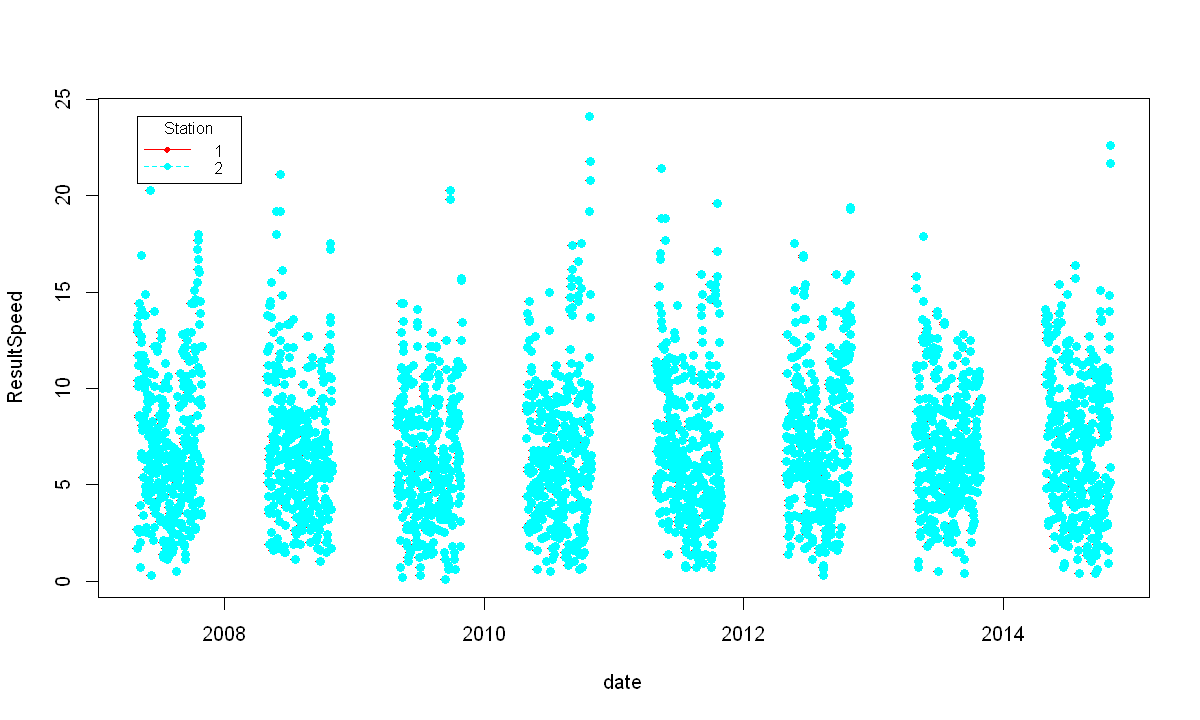

In [43]:
 options(repr.plot.width = 10, repr.plot.height = 6)
# convert factor to numeric for convenience 
weaWNV$Station <- as.numeric(weaWNV$Station) 
nst<-max(weaWNV$Station)

# get the range for the x and y axis 
xrange <- range(weaWNV$Date) 
yrange <- range(weaWNV$ResultSpeed) 

# set up the plot 
plot(xrange, yrange, type="n", xlab="date",
   ylab="ResultSpeed" ) 
colors <- rainbow(nst) 
linetype <- c(1:nst) 
plotchar <- seq(18,18+nst,1)

# add lines 
for (i in 1:nst) { 
  station <- subset(weaWNV, Station==i) 
  lines(weaWNV$Date, weaWNV$ResultSpeed, type="p", lwd=1.5,
    lty=linetype[i], col=colors[i], pch=plotchar[i]) 
    }

# add a legend 
legend(xrange[1], yrange[2], 1:nst, cex=0.8, col=colors,
   pch=plotchar, lty=linetype, title="Station")

In [ ]:
WetBulb

In [96]:
# using subset function 
wea1 <- subset(weaWNV, Station == 1)
head(wea1)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1,1,2007-05-01,83,50,32,32,51,25,1,3,0448,1849,,0,0,29.10,29.82,1.7,27,9.2
3,1,2007-05-02,59,42,16,11,42,16,7,1,0447,1850,BR,0,0,29.38,30.09,13.0,4,13.4
5,1,2007-05-03,66,46,21,20,40,17,30,1,0446,1851,,0,0,29.39,30.12,11.7,7,11.9
7,1,2007-05-04,66,49,23,22,41,19,28,1,0444,1852,RA,0,0,29.31,30.05,10.4,8,10.8
9,1,2007-05-05,66,53,25,23,38,18,26,1,0443,1853,,0,0,29.40,30.10,11.7,7,12.0
11,1,2007-05-06,68,49,24,22,30,15,27,1,0442,1855,,0,0,29.57,30.29,14.4,11,15.0


In [97]:
summary(wea1)

 Station       Date                 Tmax             Tmin            Tavg      
 1:1472   Min.   :2007-05-01   Min.   : 42.00   Min.   :29.00   Min.   : 1.00  
 2:   0   1st Qu.:2009-03-16   1st Qu.: 68.00   1st Qu.:49.00   1st Qu.:25.00  
          Median :2011-01-30   Median : 78.00   Median :58.00   Median :33.00  
          Mean   :2011-01-30   Mean   : 75.98   Mean   :56.73   Mean   :31.61  
          3rd Qu.:2012-12-15   3rd Qu.: 85.00   3rd Qu.:65.00   3rd Qu.:40.00  
          Max.   :2014-10-31   Max.   :103.00   Max.   :82.00   Max.   :58.00  
                                                                               
     Depart         DewPoint        WetBulb           Heat       
 Min.   : 1.00   Min.   :22.00   Min.   : 1.00   Min.   : 1.000  
 1st Qu.:13.00   1st Qu.:46.00   1st Qu.:22.00   1st Qu.: 1.000  
 Median :20.00   Median :54.00   Median :29.00   Median : 1.000  
 Mean   :18.82   Mean   :53.38   Mean   :28.04   Mean   : 6.509  
 3rd Qu.:25.00   3rd Qu.:61.25

In [98]:
describe(wea1)

wea1 

 20  Variables      1472  Observations
--------------------------------------------------------------------------------
Station 
       n  missing distinct    value 
    1472        0        1        1 
               
Value         1
Frequency  1472
Proportion    1
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
    1472        0     1472 

lowest : 2007-05-01 2007-05-02 2007-05-03 2007-05-04 2007-05-05
highest: 2014-10-27 2014-10-28 2014-10-29 2014-10-30 2014-10-31
--------------------------------------------------------------------------------
Tmax 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1472        0       60    0.999    75.98    12.94       54       59 
     .25      .50      .75      .90      .95 
      68       78       85       89       92 

lowest :  42  44  45  46  47, highest:  98  99 100 102 103
---------------------------------------------------------------------

In [99]:
# using subset function 
wea2 <- subset(weaWNV, Station == 2)
head(wea2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2,2,2007-05-01,84,52,33,NA,51,26,1,4,-,-,,NA,0,29.18,29.82,2.7,25,9.6
4,2,2007-05-02,60,43,17,NA,42,16,6,1,-,-,BR HZ,NA,0,29.44,30.08,13.3,2,13.4
6,2,2007-05-03,67,48,23,NA,40,19,28,1,-,-,HZ,NA,0,29.46,30.12,12.9,6,13.2
8,2,2007-05-04,78,51,NA,NA,42,19,NA,NA,-,-,,NA,0,29.36,30.04,10.1,7,10.4
10,2,2007-05-05,66,54,25,NA,39,19,26,1,-,-,,NA,0,29.46,30.09,11.2,7,11.5
12,2,2007-05-06,68,52,25,NA,30,15,26,1,-,-,,NA,0,29.62,30.28,13.8,10,14.5


In [100]:
describe(wea2)

wea2 

 20  Variables      1472  Observations
--------------------------------------------------------------------------------
Station 
       n  missing distinct    value 
    1472        0        1        2 
               
Value         2
Frequency  1472
Proportion    1
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
    1472        0     1472 

lowest : 2007-05-01 2007-05-02 2007-05-03 2007-05-04 2007-05-05
highest: 2014-10-27 2014-10-28 2014-10-29 2014-10-30 2014-10-31
--------------------------------------------------------------------------------
Tmax 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1472        0       61    0.999    76.35    12.84    54.55    60.00 
     .25      .50      .75      .90      .95 
   69.00    78.00    85.00    89.00    92.00 

lowest :  41  44  45  46  47, highest:  99 100 101 102 104
---------------------------------------------------------------------

In [107]:
colnames(wea2) <- c("Station2", "Date2","Tmax2", "Tmin2","Tavg2","DewPoint2","WetBulb2","Heat2","Cool2","CodeSum2","PrecipTotal2","StnPressure2","SeaLevel2","ResultSpeed2","ResultDir2","AvgSpeed2")


In [108]:
summary(wea2)

 Station2     Date2                Tmax2            Tmin2           Tavg2      
 1:   0   Min.   :2007-05-01   Min.   : 41.00   Min.   :29.00   Min.   : 1.00  
 2:1472   1st Qu.:2009-03-16   1st Qu.: 69.00   1st Qu.:51.00   1st Qu.:26.00  
          Median :2011-01-30   Median : 78.00   Median :60.00   Median :35.00  
          Mean   :2011-01-30   Mean   : 76.35   Mean   :58.89   Mean   :32.88  
          3rd Qu.:2012-12-15   3rd Qu.: 85.00   3rd Qu.:67.00   3rd Qu.:41.00  
          Max.   :2014-10-31   Max.   :104.00   Max.   :83.00   Max.   :59.00  
                                                                NA's   :11     
   DewPoint2        WetBulb2         Heat2            Cool2      
 Min.   :23.00   Min.   : 2.00   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:46.00   1st Qu.:22.00   1st Qu.: 1.000   1st Qu.: 1.00  
 Median :55.00   Median :30.00   Median : 1.000   Median : 6.00  
 Mean   :53.54   Mean   :28.59   Mean   : 6.091   Mean   : 7.06  
 3rd Qu.:62.00   3rd Qu.:36.00

In [102]:
wea2["Depart"] <- NULL
wea2["SnowFall"] <- NULL
wea2["Sunrise"] <- NULL
wea2["Sunset"] <- NULL

In [103]:
str(wea2)

'data.frame':	1472 obs. of  16 variables:
 $ Station    : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ Date       : Date, format: "2007-05-01" "2007-05-02" ...
 $ Tmax       : int  84 60 67 78 66 68 84 80 76 83 ...
 $ Tmin       : int  52 43 48 51 54 52 50 60 63 59 ...
 $ Tavg       : num  33 17 23 NA 25 25 32 35 35 36 ...
 $ DewPoint   : int  51 42 40 42 39 30 39 57 60 52 ...
 $ WetBulb    : num  26 16 19 19 19 15 22 32 32 30 ...
 $ Heat       : num  1 6 28 NA 26 26 1 1 1 1 ...
 $ Cool       : num  4 1 1 NA 1 1 3 6 6 7 ...
 $ CodeSum    : Factor w/ 98 levels " ","BCFG BR",..: 1 4 20 1 1 1 1 20 4 4 ...
 $ PrecipTotal: num  0 0 0 0 0 0 0 0 0.02 0 ...
 $ StnPressure: Factor w/ 104 levels "28.55","28.59",..: 49 75 77 67 77 93 75 67 59 57 ...
 $ SeaLevel   : Factor w/ 102 levels "29.23","29.25",..: 40 66 70 62 67 86 70 60 51 49 ...
 $ ResultSpeed: num  2.7 13.3 12.9 10.1 11.2 13.8 8.5 2.5 3.9 2 ...
 $ ResultDir  : int  25 2 6 7 7 10 17 8 7 9 ...
 $ AvgSpeed   : Factor w/ 178 leve

In [104]:
str(wea1)

'data.frame':	1472 obs. of  20 variables:
 $ Station    : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ Date       : Date, format: "2007-05-01" "2007-05-02" ...
 $ Tmax       : int  83 59 66 66 66 68 83 82 77 84 ...
 $ Tmin       : int  50 42 46 49 53 49 47 54 61 56 ...
 $ Tavg       : num  32 16 21 23 25 24 30 33 34 35 ...
 $ Depart     : num  32 11 20 22 23 22 28 30 31 32 ...
 $ DewPoint   : int  51 42 40 41 38 30 41 58 59 52 ...
 $ WetBulb    : num  25 16 17 19 18 15 23 31 32 29 ...
 $ Heat       : num  1 7 30 28 26 27 1 1 1 1 ...
 $ Cool       : num  3 1 1 1 1 1 1 4 5 6 ...
 $ Sunrise    : chr  "0448" "0447" "0446" "0444" ...
 $ Sunset     : chr  "1849" "1850" "1851" "1852" ...
 $ CodeSum    : Factor w/ 98 levels " ","BCFG BR",..: 1 3 1 24 1 1 24 3 4 3 ...
 $ SnowFall   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ PrecipTotal: num  0 0 0 0 0 0 0 0 0.13 0 ...
 $ StnPressure: Factor w/ 104 levels "28.55","28.59",..: 41 69 70 62 71 88 69 60 52 51 ...
 $ SeaLevel   : Factor w/ 102 levels

In [109]:
write.csv(wea2, file="C:/Users/Chen/Project/data/wea2.csv", row.names =F) #weater station 2

In [110]:
write.csv(wea1, file="C:/Users/Chen/Project/data/wea1.csv", row.names =F) #weater station 1